Problema de Poisson

\begin{equation*}
  \begin{cases}
    \nabla^2 u = cos(2\pi x) &\text{ para } \Omega\\
    u = 0 &\text{ para } \partial\Omega_{D}\\
    \nabla u \cdot \vec{n} =0 &\text{ para } \partial\Omega_{A, B, C}
  \end{cases}
\end{equation*}

T = 
[[-4.  2.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  2. -4.]]
A1 = 
[[-4.  2.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  2. -4.]]
A2 = 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


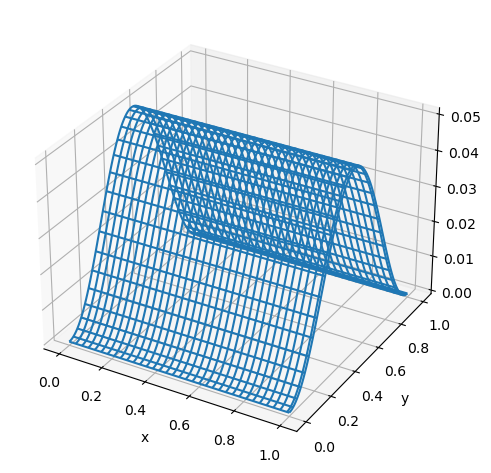

In [4]:
import matplotlib.pyplot as plt
import numpy as np


h = 0.01
x = np.arange(0, 1+h/2, h)
y = np.arange(0, 1+h/2, h)

tam = len(x)

#monta a matriz T para cada coluna do domínio
T = np.zeros((tam, tam))
T[0,0] = -4
T[0,1] = 2
for i in range(1, tam-1):
    T[i,i] = -4
    T[i,i+1] = 1
    T[i,i-1] = 1

T[tam-1, tam-1] = -4
T[tam-1, tam-2] = 2

print("T = ")
print(T)

I = np.eye(tam)
A1 = np.kron(I, T)

print("A1 = ")
print(A1)

e2 = np.diag(np.ones(tam-1), -1) + np.diag(np.ones(tam-1), 1)

e2[0,1] = 0
e2[-1,-2] = 0

#print(e2)

A2 = np.kron(e2, I)

print("A2 = ")
print(A2)

#e3 = np.diag(np.ones(tam-1),-1)+np.diag(np.ones(tam-1),1)
#e3[1:-1, 0:]=0

e3 = np.zeros((tam, tam))
e3[0,1] = 1
e3[tam-1,tam-2] = 1

#print(e3)

A3 = np.kron(e3, 2*I)

A = A1 + A2 + A3

#aplicando condição de Dirichlet
for i in range(tam):
    A[i,:] = 0
    A[i,i] = 1

f = np.zeros(tam*tam)

for i in range(tam):
    for j in range(tam):
        f[i*tam+ j] = np.cos(2*np.pi*x[i])

f *= h**2

#aplicando condição de Dirichlet
f[0:tam]=0

u_sl = np.linalg.solve(A, f)

x, y = np.meshgrid(x, y)

u = np.zeros((tam, tam))
for i in range(tam):
    for j in range(tam):
        u[i,j] = u_sl[i*tam + j]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(x, y, u)
plt.ylabel('y')
plt.xlabel('x')
plt.tight_layout()
plt.show()